## Convert imaging data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from showit import image

In [3]:
from mesoscope.preprocess import loadImages
from mesoscope.utils import normalize

In [4]:
from skimage.io import imsave

In [5]:
from os.path import exists
from os import mkdir
from json import dump

###Set directory and session information

In [6]:
#base = '/tier2'
base = '/Volumes'
directory = base + '/freeman/Nick/mVR/sessions'

## Load data

In [11]:
key = '000131'
prefix = 'trial'
path = directory + '/' + key
print path
print exists(path)

/Volumes/freeman/Nick/mVR/sessions/000131
True


In [12]:
meta, data = loadImages(path + '/images-raw/' + prefix + '*', engine = None)

In [13]:
print data
print '\n', meta

Images
mode: local
dtype: int16
shape: (44, 1766, 1792)

{'nrois': 1, 'power': 10, 'nchannels': 1, 'nplanes': 1, 'averaging': u'_Inf_', 'depths': 0, 'rois': [{'depths': 0.0, 'npixels': [1792.0, 1766.0], 'center': [-0.0066098044471500283, 4.9960036113750006e-16], 'size': [4.2623502320699993, 4.2000000005250007]}], 'shape': (44, 1766, 1792), 'volumeRate': 1.817867823}


## Inspect data

In [14]:
mean = data.mean().toarray()

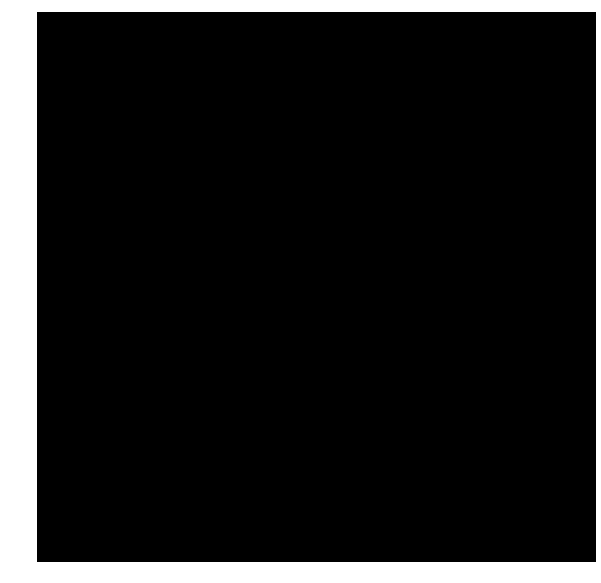

In [15]:
img = mean
image(img, clim=(0, 100+3.5*img.mean()), size = 10);

##Save binary images

In [16]:
if not exists(path + '/images'):
    mkdir(path + '/images')
data.tobinary(path + '/images', overwrite=True)

##Save summary data

###Meta data

In [17]:
if not exists(path + '/summary'):
    mkdir(path + '/summary')
with open(path + '/summary/meta.json', 'w') as fid:
    dump(meta, fid, indent=2)

###Raw tiffs

In [18]:
imsave(path + '/summary/raw-' + prefix + '.tif', mean.astype('float32'), plugin='tifffile', photometric='minisblack')

###Normalized tiffs

In [19]:
norm = normalize(mean).astype('float32')
#norm = data.map(normalize)

AssertionError: 

In [ ]:
imsave(path + '/summary/raw-norm-' + prefix + '.tif', norm, plugin='tifffile', photometric='minisblack')